# Wahrscheinlichkeitsverteilungen

## Libraries

In [5]:
%matplotlib inline
import matplotlib.pyplot as pyplot
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize': (5,5)})

## Uniform distribution

In [6]:
from scipy.stats import uniform

In [7]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


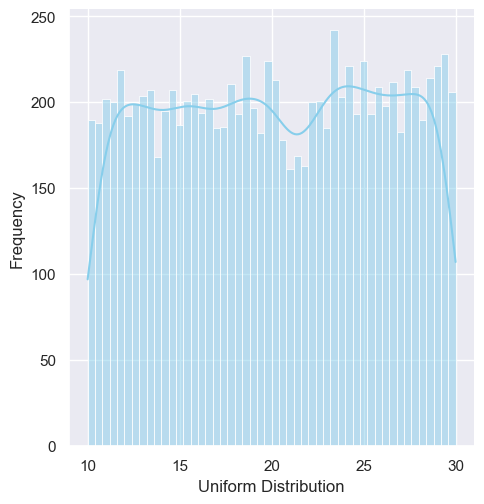

In [8]:
ax = sns.displot(data_uniform, bins=50, kde=True, color='skyblue')
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

## Normal distribution

In [9]:
from scipy.stats import norm

In [10]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


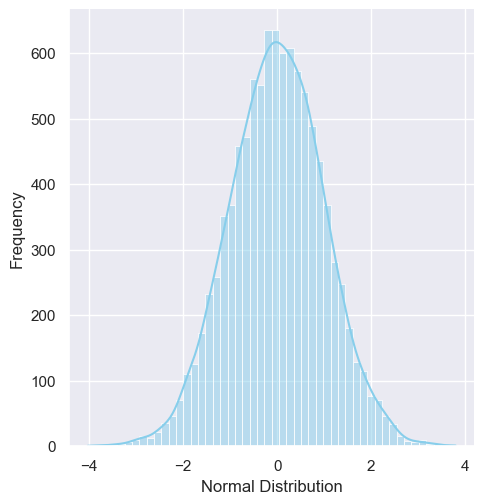

In [11]:
ax = sns.displot(data_normal, bins=50, kde=True, color='skyblue')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Gamma distribution

In [12]:
from scipy.stats import gamma

In [13]:
data_gamma = gamma.rvs(size=10000, a=3)

C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


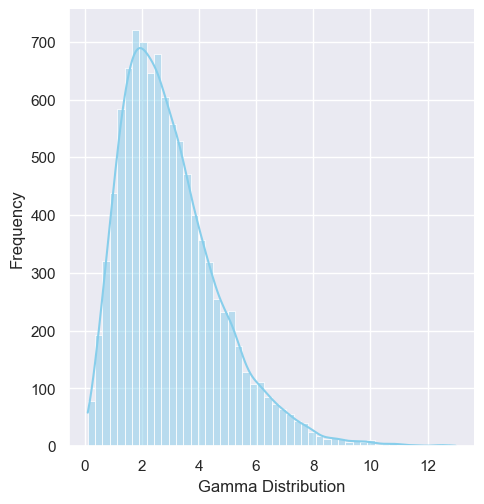

In [14]:
ax = sns.displot(data_gamma, bins=50, kde=True, color='skyblue')
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

## Exponential distribution

In [15]:
from scipy.stats import expon

In [16]:
data_expon = expon.rvs(size=10000, scale=1, loc=0)

C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


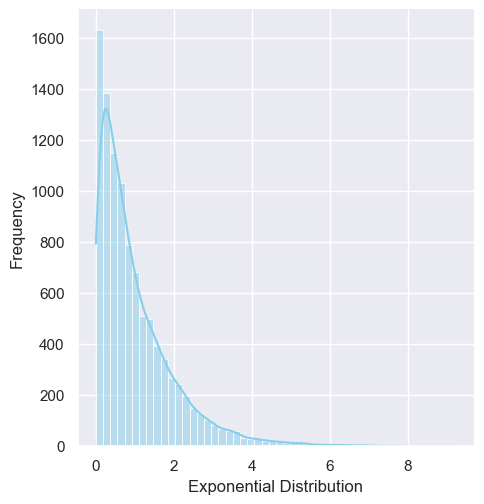

In [17]:
ax = sns.displot(data_expon, bins=50, kde=True, color='skyblue')
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Poisson distribution

In [18]:
from scipy.stats import poisson

In [35]:
data_poisson = poisson.rvs(size=10000, mu=15)

C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


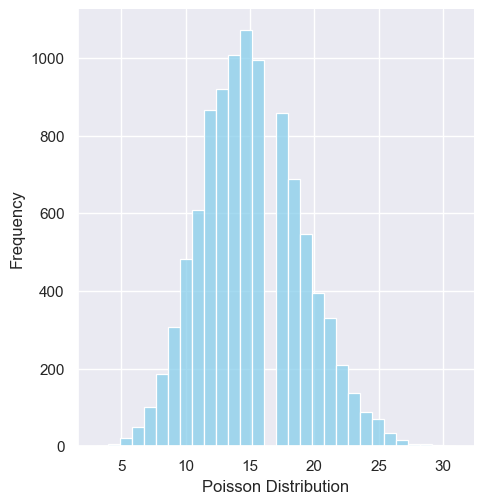

In [37]:
ax = sns.displot(data_poisson, bins=30, kde=False, color='skyblue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Binomial distribution

In [21]:
from scipy.stats import binom

In [27]:
data_binom = binom.rvs(size=10000, n=10, p=0.7)

C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


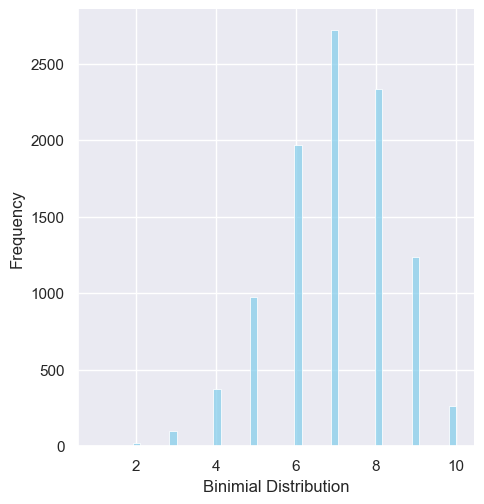

In [28]:
ax = sns.displot(data_binom, kde=False, color='skyblue')
ax.set(xlabel='Binimial Distribution', ylabel='Frequency')

## Bernoulli distribution

In [24]:
from scipy.stats import bernoulli

In [25]:
data_bern = bernoulli.rvs(size=10000, p=0.6)

C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


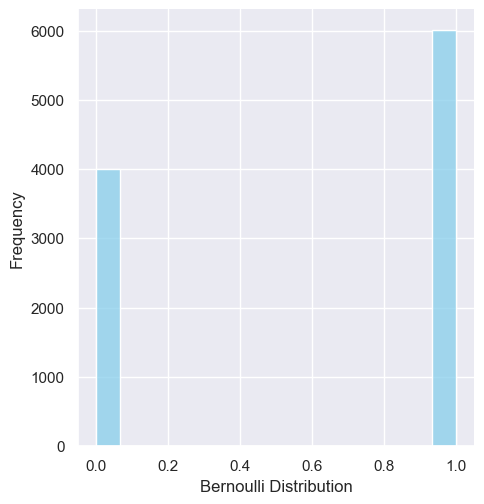

In [26]:
ax = sns.displot(data_bern, kde=False, color='skyblue')
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Multivariante Wahrscheinlichkeitsverteilungen

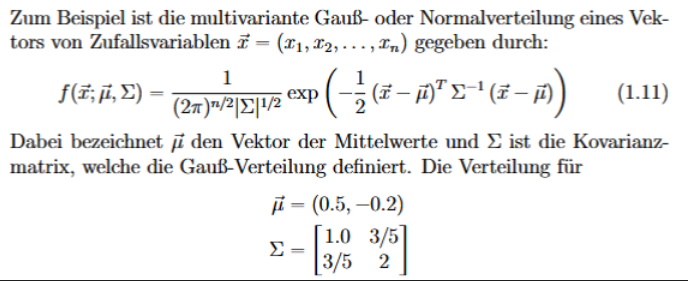

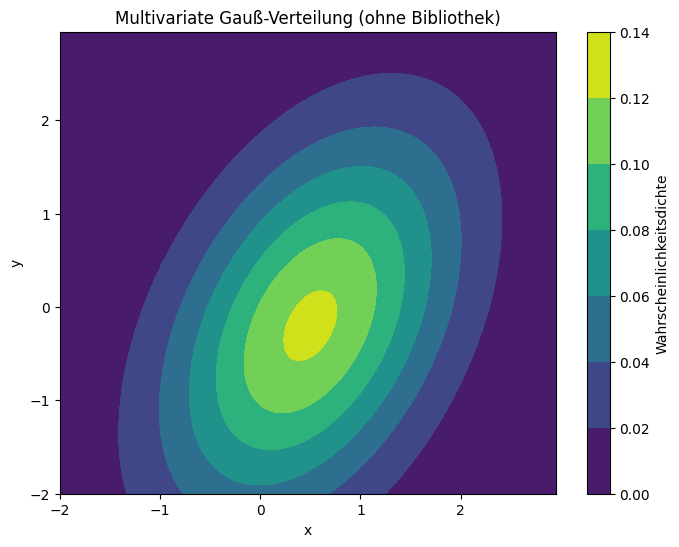

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definierte Parameter
mu = np.array([0.5, -0.2])  # Mittelwerte
Sigma = np.array([[1.0, 3/5], [3/5, 2]])  # Kovarianzmatrix

# Berechnung der Inversen und Determinante der Kovarianzmatrix
Sigma_inv = np.linalg.inv(Sigma)
det_Sigma = np.linalg.det(Sigma)

# Erstellen eines Gitters für x und y
x, y = np.mgrid[-2:3:.05, -2:3:.05]
pos = np.dstack((x, y))

# Berechnung der multivariaten Gauß-Funktion gemäß der Formel
def multivariate_gaussian(pos, mu, Sigma_inv, det_Sigma):
    n = len(mu)
    norm_factor = 1 / ((2 * np.pi) ** (n / 2) * np.sqrt(det_Sigma))
    diff = pos - mu
    exponent = -0.5 * np.einsum('...i,ij,...j', diff, Sigma_inv, diff)
    return norm_factor * np.exp(exponent)

# Berechnen der Wahrscheinlichkeitsdichte
pdf = multivariate_gaussian(pos, mu, Sigma_inv, det_Sigma)

# Plotten der Dichtefunktion
plt.figure(figsize=(8, 6))
plt.contourf(x, y, pdf, cmap='viridis')
plt.colorbar(label='Wahrscheinlichkeitsdichte')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multivariate Gauß-Verteilung (ohne Bibliothek)')
plt.show()


<Figure size 800x800 with 0 Axes>

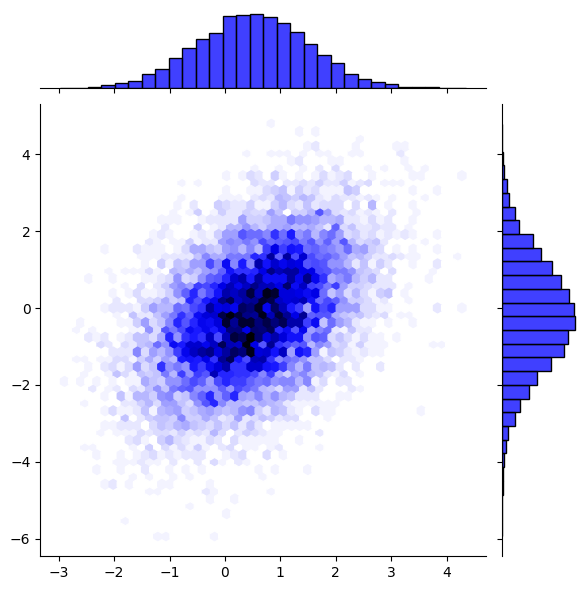

In [ ]:
import seaborn as sns

# Zufallswerte aus der multivariaten Normalverteilung generieren
np.random.seed(42)
samples = np.random.multivariate_normal(mu, Sigma, 10000)

# Scatterplot mit Dichtediagrammen erstellen
plt.figure(figsize=(8, 8))
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind="hex", color="blue", marginal_kws={'bins': 30, 'fill': True})
plt.show()
